# Study of using different features to predict cheese fat level

## Introduction

In this study, we will explore and analyze the cheese dataset from resource of goveronment. This dataset has various categrocial, numerical, binary and string type variables, which we will get into details later in this study. 

After briefly reviewing the data, I decide to use **FatLevel** as the target and mainly focus on features including **ManufacturerProvCode, ManufacturingTypeEn, CategoryTypeEn, MilkTypeEn, MilkTreatmentTypeEn, MoisturePercent, Organic**. Nowadays, more and more people pay attention to the food nutrients and they start reading nutrition facts table and trying to understand how much sugar, fat or calories they will consume. For many of them, they prefer food with low-calorie or low-fat to lose/control weight and also for the sake of being healthy. Therefore, in this study, I will use **FatLevel** as the target. With all the other features to select, train and optimize model, ideally, I would like to use the model to predict the **FatLevel** when given values of features. Since the **FatLevel** is categorical varibles, it would be a classification problem. Even though I understand that specifying the positive label is important to evaluate the metrics of model. For this study, I would choose not to do so because *higer fat* cheeese is also preferred by a lot of people for the sake of great mouthfeel, texture and flavor. Taking this into consideration, either *lower fat* and *higher fat* can be positive label. We will interpret the data and output accordingly later in this study.

## Exploratory Data Analysis

In [1]:
# Import pandas libary as pd
import pandas as pd

In [2]:
# Import the data from the folder and save as cheese_data
cheese_data = pd.read_csv('data/cheese_data.csv')

In [3]:
# import library from sklearn for splitting the data
from sklearn.model_selection import train_test_split, cross_validate

# Split the dataset into train and test
train_df, test_df = train_test_split(cheese_data, test_size = 0.2, random_state = 123)

In [4]:
# Take a look of the train_df and review the information to understand the features and their data types
train_df.head()

,CheeseId,ManufacturerProvCode,ManufacturingTypeEn,MoisturePercent,FlavourEn,CharacteristicsEn,Organic,CategoryTypeEn,MilkTypeEn,MilkTreatmentTypeEn,RindTypeEn,CheeseName,FatLevel
482,1506,QC,Artisan,48.0,"Sharp, hazelnutty","Pressed, surface-ripened",0,Semi-soft Cheese,Cow,Pasteurized,Washed Rind,Raclette Griffon,lower fat
896,2055,QC,Artisan,45.0,NaN,NaN,0,Veined Cheeses,Cow,Pasteurized,NaN,Rébellion 1837,higher fat
421,1445,QC,Industrial,50.0,Mild,NaN,0,Soft Cheese,Cow,Pasteurized,Bloomy Rind,Mini-Brie,lower fat
929,2141,BC,Artisan,40.0,NaN,NaN,0,Semi-soft Cheese,Cow,Pasteurized,No Rind,Aged Farmhouse,higher fat
737,1810,QC,Artisan,65.0,Acidulous,"Crumbly and soft texture, whitish",0,Fresh Cheese,Cow,Pasteurized,No Rind,Ricotta (l'Ancêtre),lower fat


From train_df, there are 13 columns in total (our target is **FatLevel**). Next step, let's take a more close look at these features and target and figure out the following two questions: 1. What are their datatypes, 2. Which feature has null values we need to deal with in this analysis.

In [5]:
# Use describe to take a look of each columns
train_df.describe(include='all')

,CheeseId,ManufacturerProvCode,ManufacturingTypeEn,MoisturePercent,FlavourEn,CharacteristicsEn,Organic,CategoryTypeEn,MilkTypeEn,MilkTreatmentTypeEn,RindTypeEn,CheeseName,FatLevel
count,833.000000,833,833,821.000000,637,522,833.000000,813,832,781,579,833,833
unique,NaN,10,3,NaN,515,446,NaN,6,8,3,4,830,2
top,NaN,QC,Industrial,NaN,Mild,Creamy,NaN,Firm Cheese,Cow,Pasteurized,No Rind,Boerenkaas,lower fat
freq,NaN,635,370,NaN,48,12,NaN,271,596,648,329,2,548
mean,1563.432173,NaN,NaN,47.052741,NaN,NaN,0.091236,NaN,NaN,NaN,NaN,NaN,NaN
std,445.350681,NaN,NaN,9.660351,NaN,NaN,0.288118,NaN,NaN,NaN,NaN,NaN,NaN
min,228.000000,NaN,NaN,12.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,1290.000000,NaN,NaN,40.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,1554.000000,NaN,NaN,46.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,1897.000000,NaN,NaN,52.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN


From this table, it can be concluded the data types of each columns as follows:
1. Categorical: ManufacturerProvCode, ManufacturingTypeEn, CategoryTypeEn, MilkTypeEn, MilkTreatmentTypeEn, RindTypeEn, FatLevel
2. Numerical: CheeseId (int), MoisturePercent (float), Organic (binary categorical)
3. Text/String: FlavourEn, CharacteristicsEn, CheeseName

In this study, we will be focusing on the categorical and numerical columns.
The colunmn **Organic** is classified as the numerical datatype. To be specific, it is actually categorical feature binary.
Let's look into the details of all categorical columns. 

In [6]:
categorical_dict= {'ManufacturerProvCode': train_df['ManufacturerProvCode'].unique().tolist(),
                  'ManufacturingTypeEn': train_df['ManufacturingTypeEn'].unique().tolist(),
                  'CategoryTypeEn': train_df['CategoryTypeEn'].unique().tolist(),
                  'MilkTypeEn': train_df['MilkTypeEn'].unique().tolist(),
                  'MilkTreatmentTypeEn': train_df['MilkTreatmentTypeEn'].unique().tolist(),
                  'RindTypeEn': train_df['RindTypeEn'].unique().tolist(),
                  'FatLevel': train_df['FatLevel'].unique().tolist()}
categorical_df = pd.DataFrame.from_dict(categorical_dict, orient='index')
categorical_df

,0,1,2,3,4,5,6,7,8,9
ManufacturerProvCode,QC,BC,ON,MB,AB,NL,NS,NB,PE,SK
ManufacturingTypeEn,Artisan,Industrial,Farmstead,None,None,None,None,None,None,None
CategoryTypeEn,Semi-soft Cheese,Veined Cheeses,Soft Cheese,Fresh Cheese,Firm Cheese,NaN,Hard Cheese,None,None,None
MilkTypeEn,Cow,Ewe and Goat,Goat,Ewe,Ewe and Cow,Cow and Goat,NaN,"Cow, Goat and Ewe",Buffalo Cow,None
MilkTreatmentTypeEn,Pasteurized,NaN,Raw Milk,Thermised,None,None,None,None,None,None
RindTypeEn,Washed Rind,NaN,Bloomy Rind,No Rind,Brushed Rind,None,None,None,None,None
FatLevel,lower fat,higher fat,None,None,None,None,None,None,None,None


From the output, we can clearly see what values for each categorical columns. To be specifica, **ManufacturerProvCode** has 10 values including QC, BC, ON, MB, AB, NL, NS, NB, PE, SK; **ManufacturingTypeEN** has 3 values including Artisan, Industrial, Farmstead; **CategoryTypeEn** has 6 values including Semi_soft Cheese, Veined Cheeses, Soft Cheese, Fresh Cheese, Firm Cheese and Hard Cheese. One thing should be noticed here is that this column has null values which we need to deal with later in this analysis; **MilkTypeEn** has 8 values including Cow, Ewe and Goat, Goat, Ewe, Ewe and Cow, Cow and Goat, Cow, Got and Ewe, and Buffalo Cow. This column also include null values; **MilkTreatmentTypeEn** has 3 values including Pasteurized, Raw Milk, and Thermised. It also contains null values; **RindTypeEm** has 4 values containing Washed Rind, Bloomy Rind, No Rind, and Brushed Rind. It also contains null values; For our target column FatLevel, it has 2 values includes lower fat and higher fat.

Next, let us look into the summary information for the columns with numerical datatypes.

In [7]:
train_df.describe()

,CheeseId,MoisturePercent,Organic
count,833.000000,821.000000,833.000000
mean,1563.432173,47.052741,0.091236
std,445.350681,9.660351,0.288118
min,228.000000,12.000000,0.000000
25%,1290.000000,40.000000,0.000000
50%,1554.000000,46.000000,0.000000
75%,1897.000000,52.000000,0.000000
max,2391.000000,92.000000,1.000000


**CheeseId** is only used as a identifier in this analysis so it is not a feature we are interested in. **Organic**, as mentioned earlier, is a binary values. Personally, I am very interested in the **MoisturePercent** value which has a mean value of 47.05. Actually, in the food industry, moisture content is important factor related to its shelf life. It actually can be used as a target and the results will be very meaningfull for the food industry to evalute and predict the shelf life. However, we are not going to get into more details in this study. 

In [8]:
# use info() to get more information from the dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 833 entries, 482 to 1041
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CheeseId              833 non-null    int64  
 1   ManufacturerProvCode  833 non-null    object 
 2   ManufacturingTypeEn   833 non-null    object 
 3   MoisturePercent       821 non-null    float64
 4   FlavourEn             637 non-null    object 
 5   CharacteristicsEn     522 non-null    object 
 6   Organic               833 non-null    int64  
 7   CategoryTypeEn        813 non-null    object 
 8   MilkTypeEn            832 non-null    object 
 9   MilkTreatmentTypeEn   781 non-null    object 
 10  RindTypeEn            579 non-null    object 
 11  CheeseName            833 non-null    object 
 12  FatLevel              833 non-null    object 
dtypes: float64(1), int64(2), object(10)
memory usage: 91.1+ KB


From the output, it can been seen that there are 833 entries in total, in which **MoisturePercent, FlavourEn, CharacteristicsEn, CategoryTypeEn, MilkTypeEn, MilkTreatmentTypeEn, RindTypeEn** have null values. The results aligns with our previous analysis and these null values need to be imputed later in this study.

For this study, our target is **FatLevel**. For the features, we will mainly focus on **ManufacturerProvCode, ManufacturingTypeEn, CategoryTypeEn, MilkTypeEn, MilkTreatmentTypeEn, MoisturePercent, Organic**.

For data visualization, let us take a look at the relationship between **FatLevel** and **CategoryTypeEn** and **MoisturePercent** 

In [9]:
# import library for data visualization
import altair as alt

In [10]:
# Get the count for different FatLevel in different CategoryTypeEn
CT_FL_df = train_df.loc[:,['CategoryTypeEn', 'FatLevel']]
CT_FL_group_df = CT_FL_df.groupby(['CategoryTypeEn', 'FatLevel']).size().reset_index(name='count')
CT_FL_group_df

,CategoryTypeEn,FatLevel,count
0,Firm Cheese,higher fat,154
1,Firm Cheese,lower fat,117
2,Fresh Cheese,higher fat,8
3,Fresh Cheese,lower fat,86
4,Hard Cheese,higher fat,16
5,Hard Cheese,lower fat,14
6,Semi-soft Cheese,higher fat,45
7,Semi-soft Cheese,lower fat,147
8,Soft Cheese,higher fat,49
9,Soft Cheese,lower fat,160


In [11]:
CT_FL_Chart = alt.Chart(CT_FL_group_df, width = 500, height = 300).mark_bar().encode(
            alt.X('CategoryTypeEn:N', title = 'CategoryTypeEn'),
            alt.Y('count:Q', title = 'FatLevel'),
            alt.Color('FatLevel:N', scale = alt.Scale(domain=['lower fat','higher fat'],
                                                     range=['red', 'blue']))
            ).properties(title = "CategoryTypeEn VS FatLevel")
CT_FL_Chart

alt.Chart(...)

In [12]:
# Get mean MoisturePercent of different FatLevel
F_M_df = train_df.loc[:,['FatLevel', 'MoisturePercent']]
F_M_group_df = F_M_df.groupby(['FatLevel']).mean().reset_index()
F_M_group_df

,FatLevel,MoisturePercent
0,higher fat,40.510601
1,lower fat,50.494052


In [13]:
F_M_Chart = alt.Chart(F_M_group_df, width = 300, height = 300).mark_bar().encode(
            alt.X('FatLevel:N', sort='-y', title = 'FatLevel'),
            alt.Y('MoisturePercent:Q', title = 'MoisturePercent')
            ).properties(title = "FatLevel VS MoisturePercent")
F_M_Chart

alt.Chart(...)

From these two charts, we can see that **FatLevel** has different **MoisturePercent**, and different **CategoryTypeEn** has different **FatLevel**. I have also plotted histograms of other features (**ManufacturerProvCode, ManufacturingTypeEn, MilkTypeEn, MilkTreatmentTypeEn, Organic**) VS **FatLevel** and all the feature's values are quite different in **FatLevel** (data and histogram not shown here). Therefore, these features are pretty relevant to predict the target.

Next, let us take a look at if the target is balanced.

In [14]:
train_df['FatLevel'].value_counts()

lower fat     548
higher fat    285
Name: FatLevel, dtype: int64

It seems that target has more **lower fat** values than **higher fat** values. Even though it is slightly unbalanced, it is pretty acceptable (not a huge difference like 99:1, which will need to balance out for sure). Therefore, I decide not to deal with this minor imbalance.

Another reason why I do not want to balance the data is that, some models will use argument class_weight = 'balanced' in the estimator. I actually have tried it but found out that some estimators such as KNeighborsClassifier are not able to use this arguement, while DecisionTreeClassifier and SVC can (even though the change in the score or some metrics are very minor). To be fair for the model evaluation, I decide to leave this argument out. 

Since the features and target has been decided, I will simplify the dataset by dropping the unnessory columns. Also, I will split the train_df and test_df into X_train, y_train, X_test, y_test.

In [15]:
# Drop the columns CheeseId, FlavourEn, CharacteristicsEn, RindTypeEn and CheeseName
train_dropped_df = train_df.drop(columns=['CheeseId','FlavourEn','CharacteristicsEn','RindTypeEn','CheeseName'])

In [16]:
# Also drop the same features in test_df
test_dropped_df = test_df.drop(columns=['CheeseId','FlavourEn','CharacteristicsEn','RindTypeEn','CheeseName'])

In [17]:
# Split train_dropped_df and test_dropped_df into X_train, y_train, X_test and y_test
X_train = train_dropped_df.drop(columns =['FatLevel'])
y_train = train_dropped_df['FatLevel']
X_test = test_dropped_df.drop(columns =['FatLevel'])
y_test = test_dropped_df['FatLevel']

## Methods & Results

### 1. Build baseline model

Since our datatype of our target **FatLevel** is categorical values, we will use the DummyClassifier to build the baseline model

In [18]:
# Import library from sklearn
from sklearn.dummy import DummyClassifier

In [19]:
dummy_model = DummyClassifier(strategy = 'most_frequent')

In [20]:
# Cross validate the model and get the mean score
from sklearn.model_selection import cross_validate
cv_score = pd.DataFrame.from_dict(cross_validate(dummy_model, X_train, y_train, cv = 5, return_train_score = True))
cv_score.mean()

fit_time       0.001543
score_time     0.000712
test_score     0.657860
train_score    0.657863
dtype: float64

From the result, we can see that the baseline model give pretty low test_score and train_score. 

### 2. Feature types and data transformation

The feature types and corresponding transformers are listed as follows:

*Categorical features*: ManufacturerProvCode, ManufacturingTypeEn, CategoryTypeEn, MilkTypeEn, MilkTreatmentTypeEn (transform with One_HotEncoder(handle_unknown='ignore') and impute with SimpleImputer(strategy='constant', fill_value='missing')) 

*Numerical features*: MoisturePercent (transform with StandardScaler and impute with SimpleImputer(strategy='median'))

*Binary features*: Organic (transform with One_HotEncoder(dtype=int, drop='if_binary'))

In [21]:
# Create different features
numeric_features = ['MoisturePercent']
categorical_features = ['ManufacturerProvCode', 'ManufacturingTypeEn', 'CategoryTypeEn', 'MilkTypeEn', 'MilkTreatmentTypeEn']
binary_features = ['Organic']
target_column = 'Fatlevel'

In [22]:
# Create pipeline for data transformation
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import (OneHotEncoder, StandardScaler)

numeric_transformer = make_pipeline(SimpleImputer(strategy='median'), StandardScaler())
categorical_transformer = make_pipeline(
                                        SimpleImputer(strategy = 'constant', fill_value='missing'),
                                        OneHotEncoder(handle_unknown='ignore'))
binary_transformer = make_pipeline(OneHotEncoder(drop='if_binary', dtype=int))

In [23]:
# Build a column transfomer pipeline
from sklearn.compose import ColumnTransformer
col_transformer = ColumnTransformer(
    transformers=[
        ('numeric_features', numeric_transformer, numeric_features),
        ('categorical_features', categorical_transformer, categorical_features),
        ('binary_features', binary_transformer, binary_features)
    ])

### 3. Test 2 different estimators using default parameters. 

We will choose DecisionTreeClassifier, KNeighborsClassifer and SVC as estimators using their default hyperparameters 

In [24]:
# Import library from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [25]:
# Create main pipeline
main_pipe_DT = make_pipeline(col_transformer, DecisionTreeClassifier())
main_pipe_KN = make_pipeline(col_transformer, KNeighborsClassifier())
main_pipe_SVC = make_pipeline(col_transformer, SVC())

In [26]:
# Get the cross_valiate score for DecisionTree Classifier 
DT_scores = pd.DataFrame.from_dict(cross_validate(main_pipe_DT, X_train, y_train, return_train_score=True, cv=5))
DT_scores.mean()

fit_time       0.021888
score_time     0.009386
test_score     0.817538
train_score    0.950482
dtype: float64

In [27]:
# Get the cross_valiate score for KNeighborsClassifier
KN_scores = pd.DataFrame.from_dict(cross_validate(main_pipe_KN, X_train, y_train, return_train_score = True, cv=5))
KN_scores.mean()

fit_time       0.018377
score_time     0.020680
test_score     0.801933
train_score    0.864647
dtype: float64

In [28]:
# Get the cross_validate score for SVC
SVC_scores = pd.DataFrame.from_dict(cross_validate(main_pipe_SVC, X_train, y_train, return_train_score = True, cv=5))
SVC_scores.mean()

fit_time       0.037477
score_time     0.012480
test_score     0.801890
train_score    0.834637
dtype: float64

All of these 3 estimator with default hyperparameters has higher test_score and train_score than the baseline model (DummyClassifier, test_score = 0.657860 and train_score = 0.657863). For DecisionTreeClassifier, the train_score (0.950482) is much higher than test_score (0.815150), indicating overfitting. For KNeighborsClassifier and SVC, their test_score and train_score is pretty similar. Therefore, we will move forward with these two estimators for hyperparameters tunning.

### 4. Hyperparameters optimization and metrics evaluation

First, we will tunning the hyperparameter (n-neighbors) for KNeighborsClassifier and hyperparameters(gamma and c) for SVC.

In [29]:
# Import library for hyperparameters tunning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

In [30]:
# For KNeighborsClassifier, we will use GridSearchCV, and optimize the n_neighbors hyperparameters
knn_param_grid = {'kneighborsclassifier__n_neighbors': np.arange(1, 50, 10)}
knn_search = GridSearchCV(main_pipe_KN, knn_param_grid, cv=5, return_train_score=True, verbose=1, n_jobs=-1)
knn_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('numeric_features',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['MoisturePercent']),
                                                                        ('categorical_features',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                             

In [31]:
# Find out the best parameters and score
print(knn_search.best_params_)
print(knn_search.best_score_)

{'kneighborsclassifier__n_neighbors': 11}
0.8019406969194144


In [32]:
# Find out the train_score and test_score on the best KNeighborsClassifier model
KN_best_scores = pd.DataFrame.from_dict(cross_validate(knn_search, X_train, y_train, cv=5, return_train_score=5))
KN_best_scores

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits


,fit_time,score_time,test_score,train_score
0,1.961175,0.019859,0.808383,0.839339
1,1.957336,0.018081,0.784431,0.942943
2,1.955294,0.020094,0.772455,0.863363
3,1.951630,0.018117,0.843373,0.938531
4,1.945835,0.018165,0.777108,0.946027


In [33]:
KN_best_scores.mean()

fit_time       1.954254
score_time     0.018863
test_score     0.797150
train_score    0.906041
dtype: float64

In [34]:
# For SVC, we will use RandomizedSearchCV, and optimize the C and gamma hyperparameters
svc_param_grid = {'svc__C': [0.01, 0.1, 1, 10, 100], 'svc__gamma': [0.01, 0.1, 1, 10, 100]}
svc_search = RandomizedSearchCV(main_pipe_SVC, svc_param_grid, cv=5, return_train_score=True, verbose=1, n_jobs=-1, n_iter=5, random_state=77)
svc_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('numeric_features',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('standardscaler',
                                                                                                StandardScaler())]),
                                                                               ['MoisturePercent']),
                                                                              ('categorical_features',
                                                                               Pipeline(steps=[('simpleimputer',
                 

In [35]:
# Find out the best parameters and score
print(svc_search.best_params_)
print(svc_search.best_score_)

{'svc__gamma': 0.1, 'svc__C': 10}
0.8007214486689271


In [36]:
# Find out the train_score and test_score on the best SVC model
svc_best_scores = pd.DataFrame.from_dict(cross_validate(svc_search, X_train, y_train, cv=5, return_train_score=5))
svc_best_scores

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits


,fit_time,score_time,test_score,train_score
0,1.606183,0.012024,0.814371,0.863363
1,1.594465,0.012096,0.784431,0.857357
2,1.575839,0.011540,0.802395,0.870871
3,1.592201,0.011732,0.807229,0.862069
4,1.581000,0.011873,0.795181,0.850075


In [37]:
svc_best_scores.mean()

fit_time       1.589938
score_time     0.011853
test_score     0.800721
train_score    0.860747
dtype: float64

From the results, we can see that for KNeighborsClassifier, the best hyperparameter value (neighborsclassifier__n_neighbors) is 11, which gives the model optimal validation score 0.80194. Its training score is 0.90604 (could be slight concern for overfitting). For the SVC, the best hyperparameter values is svc__gamma: 0.1, svc__C: 10, which gives us a optimal validation score of 0.80072 (similar with KNeighborsClassifier). Its training score is 0.86075. Even though it is slighter lower than KNeighbors, but it is more close to its validation score, which can be a more general model for prediction. Even though these two models have the similar accuracy, but as mentioned before, our target is slightly imbalanced (lower fat: 548, higher fat: 285). Therefore it is  not good enough to only evaluate the model based on the accuracy, we will need other more matrics to assist assess these two models.

### 5. Evaluation metrics

Since we only want to evaluate our model to see which one performs better, we do not want to touch the test data. Therefore, we will split our train data into split_train and split_valid to assess our model.

In [38]:
# Split the X_train and y_train into X_split_train, y_split_train, X_split_valid, y_split_valid
X_split_train, X_split_valid, y_split_train, y_split_valid = train_test_split(X_train, y_train, test_size = 0.2, random_state=123)

Next, we will fit each model to train data, and plot confusion matrix for each model and evalute more metrics such as accuracy, precision, racall, f1. 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


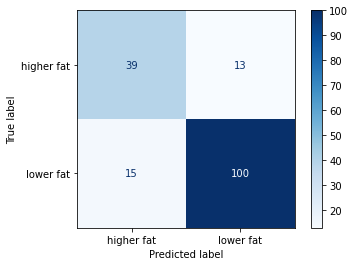

In [39]:
# Import library from sklearn
from sklearn.metrics import plot_confusion_matrix
knn_search.fit(X_split_train, y_split_train)
plot_confusion_matrix(knn_search, X_split_valid, y_split_valid, display_labels =['higher fat','lower fat'], values_format='d', cmap='Blues')

In [40]:
# Print out the classification report
from sklearn.metrics import classification_report
print(classification_report(y_split_valid, knn_search.predict(X_split_valid)))

              precision    recall  f1-score   support

  higher fat       0.72      0.75      0.74        52
   lower fat       0.88      0.87      0.88       115

    accuracy                           0.83       167
   macro avg       0.80      0.81      0.81       167
weighted avg       0.83      0.83      0.83       167



Let us run the same things on the SVC model

Fitting 5 folds for each of 5 candidates, totalling 25 fits


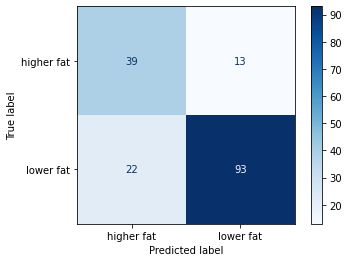

In [41]:
svc_search.fit(X_split_train, y_split_train)
plot_confusion_matrix(svc_search, X_split_valid, y_split_valid, display_labels =['higher fat','lower fat'], values_format='d', cmap='Blues')

In [42]:
print(classification_report(y_split_valid, svc_search.predict(X_split_valid)))

              precision    recall  f1-score   support

  higher fat       0.64      0.75      0.69        52
   lower fat       0.88      0.81      0.84       115

    accuracy                           0.79       167
   macro avg       0.76      0.78      0.77       167
weighted avg       0.80      0.79      0.79       167



From the result, we can see that the results for these two models are very close. Our target is **FatLevel**, therefore, either "higher fat" and "lower fat" can be positive label (some customer prefer high fat for the better flavor, some customer prefer low fat for health). However, no matter which label considered positive label, overall the KNeighborsClassifier has slightly higher precision, recall and f1-score than SVC. In addition KNeighborsClassifier has sligher higher accuracy (0.83) than SVC (0.79). Therefore, we will proceed with KNeighborsClassifier for further processing test data.

### Applying the best model to test data

In [43]:
# Get the score on the test data
knn_search.score(X_test, y_test)

0.8086124401913876

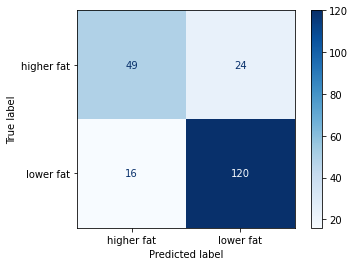

In [44]:
# Plot confusion matrix 
plot_confusion_matrix(knn_search, X_test, y_test, display_labels =['higher fat','lower fat'], values_format='d', cmap='Blues')

In [45]:
# Print classification report
print(classification_report(y_test, knn_search.predict(X_test)))

              precision    recall  f1-score   support

  higher fat       0.75      0.67      0.71        73
   lower fat       0.83      0.88      0.86       136

    accuracy                           0.81       209
   macro avg       0.79      0.78      0.78       209
weighted avg       0.81      0.81      0.81       209



In [46]:
# Get the score of test data on the baseline model DummyClassifier
dummy_model.fit(X_train, y_train)
dummy_model.score(X_test, y_test)

0.6507177033492823

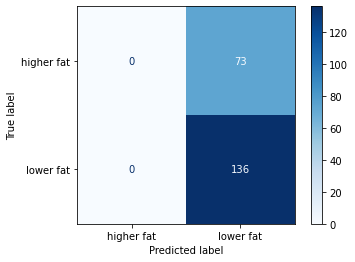

In [47]:
# Plot confusion matrix for baseline model
plot_confusion_matrix(dummy_model, X_test, y_test, display_labels =['higher fat','lower fat'], values_format='d', cmap='Blues')

In [48]:
# Print classification report for baseline model
print(classification_report(y_test, dummy_model.predict(X_test)))

              precision    recall  f1-score   support

  higher fat       0.00      0.00      0.00        73
   lower fat       0.65      1.00      0.79       136

    accuracy                           0.65       209
   macro avg       0.33      0.50      0.39       209
weighted avg       0.42      0.65      0.51       209



/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Discussion:

Using model knn_search on the test data, we get the accuracy 0.81. If we consider 'high fat' as positive label, the corresponding precision, recall and f1-score is 0.75, 0.67, 0.71, respectivly. If we consider 'low fat' as positive label, the corresponding precision, recall and f1-score is 0.83, 0.88 and 0.86, respectively.

Using baseline model on the test data, we get accuracy 0.65. If we consider 'high fat' as positive label, the corresponding precision, recall and f1-score is all 0 (this makes sense because this model use the most frequent label which is lower fat). If we consider 'low fat' as positive label, the corresponding precision, recall and f1-score is 0.65, 1.00 and 0.79, respectively.

In conclusion, the knn_search model (neighborsclassifier__n_neighbors = 11) provide better metrics scores (including the accuracy, precision, recall and f1-score) than svc_search model and baseline model. 

To improve the performance of the model, I would suggest to collect more data (observations) to balance out the target values because the arguement class_weigt are not able to use in this estimator.

For other questions, I would be interested in using the **MoisturePercent** as the target (regression question). In food industry, shelf life of food products is actually a topic Food Scientists are interested in, which is significantly affected by the moisture percent. Currently, moisture content is usually tested in the lab to get the actual values. Therefore, it would be very cool and meaningful if we can use other features to predict the moisture percent directly.

## Reference：
https://open.canada.ca/data/en/dataset/3c16cd48-3ac3-453f-8260-6f745181c83b 